In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn import linear_model
from sklearn.impute import SimpleImputer

df = pd.read_csv("Cleaned_Official_Data_New.csv")
salary_data = df[['company', 'totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'gender']]

In [27]:
df

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Education_Level,Race
0,472,11,140000,729,4.0,4.0,130000,0.0,10000.0,1,4,5
1,61,11,172000,748,12.0,2.0,142000,30000.0,0.0,1,4,5
2,1183,11,325000,718,7.0,2.0,161000,140000.0,25000.0,1,4,5
3,762,11,150000,748,4.0,0.0,118000,5000.0,12000.0,1,4,5
4,517,11,640000,537,11.0,4.0,210000,380000.0,50000.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
41499,61,11,135000,748,1.0,0.0,104000,3000.0,18500.0,1,4,5
41500,61,11,350000,47,14.0,1.0,160000,175000.0,56250.0,1,4,5
41501,762,8,305000,748,20.0,2.0,200000,75000.0,30000.0,0,4,5
41502,61,11,152000,748,3.0,0.0,106000,26000.0,20000.0,1,4,5


In [28]:
salary_data

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender
0,472,140000,4.0,4.0,1
1,61,172000,12.0,2.0,1
2,1183,325000,7.0,2.0,1
3,762,150000,4.0,0.0,1
4,517,640000,11.0,4.0,1
...,...,...,...,...,...
41499,61,135000,1.0,0.0,1
41500,61,350000,14.0,1.0,1
41501,762,305000,20.0,2.0,0
41502,61,152000,3.0,0.0,1


# Splitting and Training Sets

In [35]:
X= salary_data[['company', 'yearsofexperience', 'yearsatcompany', 'gender']]
y= salary_data['totalyearlycompensation']

In [37]:
X.shape, y.shape

((41504, 4), (41504,))

In [38]:
print(X[:10])

   company  yearsofexperience  yearsatcompany  gender
0      472                4.0             4.0       1
1       61               12.0             2.0       1
2     1183                7.0             2.0       1
3      762                4.0             0.0       1
4      517               11.0             4.0       1
5     1152                0.0             0.0       1
6      762                3.0             0.0       1
7      858                9.0             3.0       1
8       90                3.0             1.0       0
9      982               10.0             0.0       1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33203, 4) (8301, 4) (33203,) (8301,)


# Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score

In [60]:
model = RandomForestRegressor(n_estimators = 50, random_state = 50)
salary_rf = model.fit(X_train, y_train)


score = model.score(X_test, y_test)
print("R-squared:", score)

R-squared: 0.40291869055351703


In [61]:
y_train_pred = salary_rf.predict(X_train)

In [63]:
y_test_pred = salary_rf.predict(X_test)

In [64]:
y_test_pred[:10]

array([347590.76923077, 245637.64081039, 427337.76190476, 120533.33333333,
       162420.        , 179280.43329633, 133746.        , 228300.        ,
       309742.31903176,  72697.21428571])

In [66]:
r2 = r2_score(y_test, y_test_pred)

In [67]:
r2

0.40291869055351703

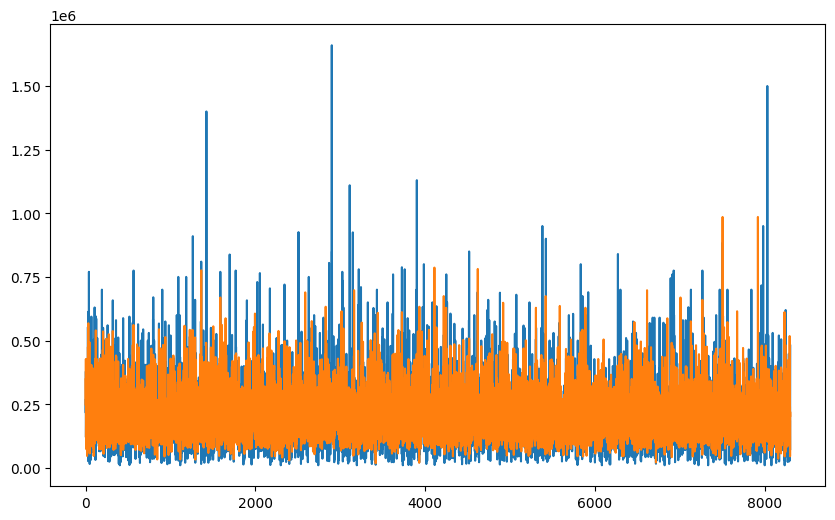

In [71]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))

plt.plot(x_ax, y_test, label = 'Oirignal')
plt.plot(x_ax, y_test_pred, label ='Predicted')

In [ ]:
salary_data['predicted_rank'] = clf.predict(X)
predicted_champion = df.loc[df['predicted_rank'].idxmin()]['TeamName']
print(f"Predicted NBA Champion: {predicted_champion}")